# Project Instructions

- Create a dataset by parsing the webpage used in class. This is the base URL (https://admn5015-340805.uc.r.appspot.com/2018-01-01.html). 

- Download these fields (date, price, likes, dislikes, and followers) for each day by changing the URL accordingly, starting on January 1st, 2018 until December 31st, 2023.

- Clean the data if needed.

- Save your downloaded dataset as a CSV file.

- Use the regression template explained in class and predict the price of the website's product (you would be predicting the price for January 1st, 2024).

- Make sure you choose the algorithm with the lowest RMSE for your prediction.


# Importing Libraries

In [2]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lars
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression
from sklearn.ensemble import RandomForestRegressor

In [1]:
# Creating a function to extract data from 2018 to 2023

In [34]:
def scrape_df():
    base_url = "https://admn5015-340805.uc.r.appspot.com/2018-01-01.html"
    start_date = datetime(2018, 1, 1)
    end_date = datetime(2023, 12, 31)
    df = []

    while start_date <= end_date:
        date_str = start_date.strftime('%Y-%m-%d')
        url = base_url.replace('2018-01-01', date_str)

        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')

        price = soup.find("td", {"id": "price"}).text
        likes = soup.find("td", {"id": "likes"}).text
        dislikes = soup.find("td", {"id": "dislikes"}).text
        followers = soup.find("td", {"id": "followers"}).text

        df.append({'date': date_str, 'price': price, 'likes': likes, 'dislikes': dislikes, 'followers': followers})

        start_date += timedelta(days=1)

    return pd.DataFrame(df)

In [35]:
df = scrape_df()

In [36]:
df.head()

,date,price,likes,dislikes,followers
0,2018-01-01,$ 1006.39 CAD,9001,402,15002
1,2018-01-02,$ 1011.81 CAD,9003,403,15003
2,2018-01-03,$ 1017.26 CAD,9004,405,15004
3,2018-01-04,$ 1022.74 CAD,9006,407,15006
4,2018-01-05,$ 1028.25 CAD,9008,408,15008


In [38]:
# Saving the data as csv file
df.to_csv(r"", index = False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       2191 non-null   object
 1   price      2191 non-null   object
 2   likes      2191 non-null   int64 
 3   dislikes   2191 non-null   int64 
 4   followers  2191 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 85.7+ KB


# Data Cleaning

In [3]:
df = pd.read_csv(r"C:\Users\risha\Desktop\Semester 4\AI Marketing\Web_Data.csv")

In [5]:
df['price'] = df['price'].str.replace(r'[\$CAD]', '', regex=True).str.strip()

In [6]:
df['price'] = df['price'].astype(float)

In [7]:
df['date']= pd.to_datetime(df['date'])

In [8]:
df['likes'] = df['likes'].astype(int)
df['dislikes'] = df['dislikes'].astype(int)
df['followers'] = df['followers'].astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       2191 non-null   datetime64[ns]
 1   price      2191 non-null   float64       
 2   likes      2191 non-null   int32         
 3   dislikes   2191 non-null   int32         
 4   followers  2191 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(3)
memory usage: 60.0 KB


In [10]:
# Descriptive Statistics
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,2191,2020-12-31 00:00:00,2018-01-01 00:00:00,2019-07-02 12:00:00,2020-12-31 00:00:00,2022-07-01 12:00:00,2023-12-31 00:00:00,NaN
price,2191.0,117997.803432,1006.39,7312.32,34942.15,162689.8,445911.69,166245.77492
likes,2191.0,11127.217252,9001.0,10001.0,11202.0,12199.5,13396.0,1267.897539
dislikes,2191.0,2064.840712,402.0,1234.5,2071.0,2893.0,3714.0,959.902626
followers,2191.0,17125.631219,15002.0,16011.0,17199.0,18199.0,19377.0,1261.799955


# Visualizations

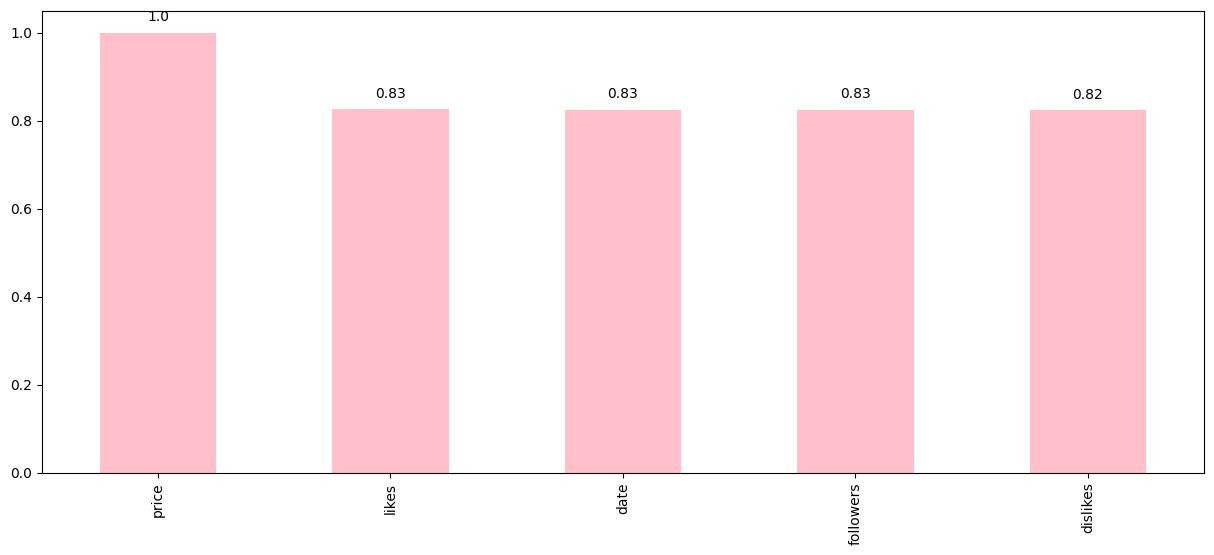

In [14]:
plt.figure(figsize=(15, 6))
corr_values = df.corr()['price'].sort_values(ascending=False)
bars = corr_values.plot(kind='bar',color = 'pink')
for i, value in enumerate(corr_values):
    plt.text(i, value + 0.02, round(value, 2), ha='center', va='bottom')

### Graph 1: Bar Plot of Correlation Coefficients
This bar plot visualizes the correlation of different variables with a target variable or among themselves.

**Variables**:  
- **Price**: Correlation value of 1.0 (likely with itself, as a variable always has a perfect correlation with itself).  
- **Other variables** (likes, date, followers, and dislikes): Similar correlation values, approximately 0.82–0.83, with the target or reference variable.  

**Interpretation**:  
- The high correlation values suggest these variables have a strong linear relationship with the target or reference variable.
- Potential redundancy or multicollinearity may exist if these variables are used together in predictive models.

<Axes: >

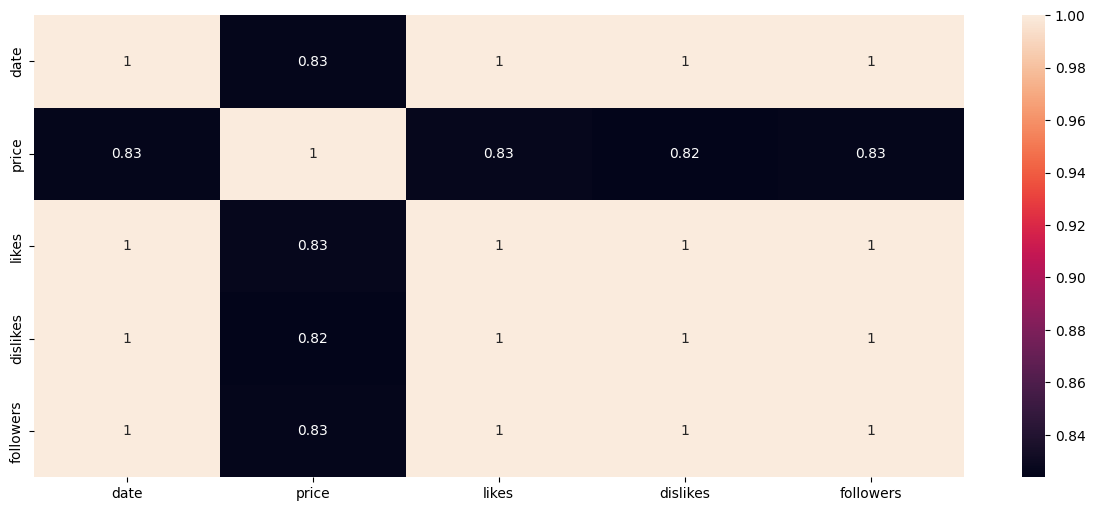

In [15]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True)

### Graph 2: Correlation Heatmap
The heatmap represents pairwise correlation coefficients between all variables.

**Key Points**:  
- **Diagonal elements**: All have values of 1.0, representing the correlation of a variable with itself.  
- **Price, likes, date, followers, and dislikes**: Moderate to strong positive correlations (ranging from 0.82–0.83) with one another.  

**Interpretation**:  
- These variables show relatively similar strengths of relationships with each other and with the reference variable (likely price).  
- Strong correlations (close to 1.0) suggest potential multicollinearity in predictive models.

C:\Users\risha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\risha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\risha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\risha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

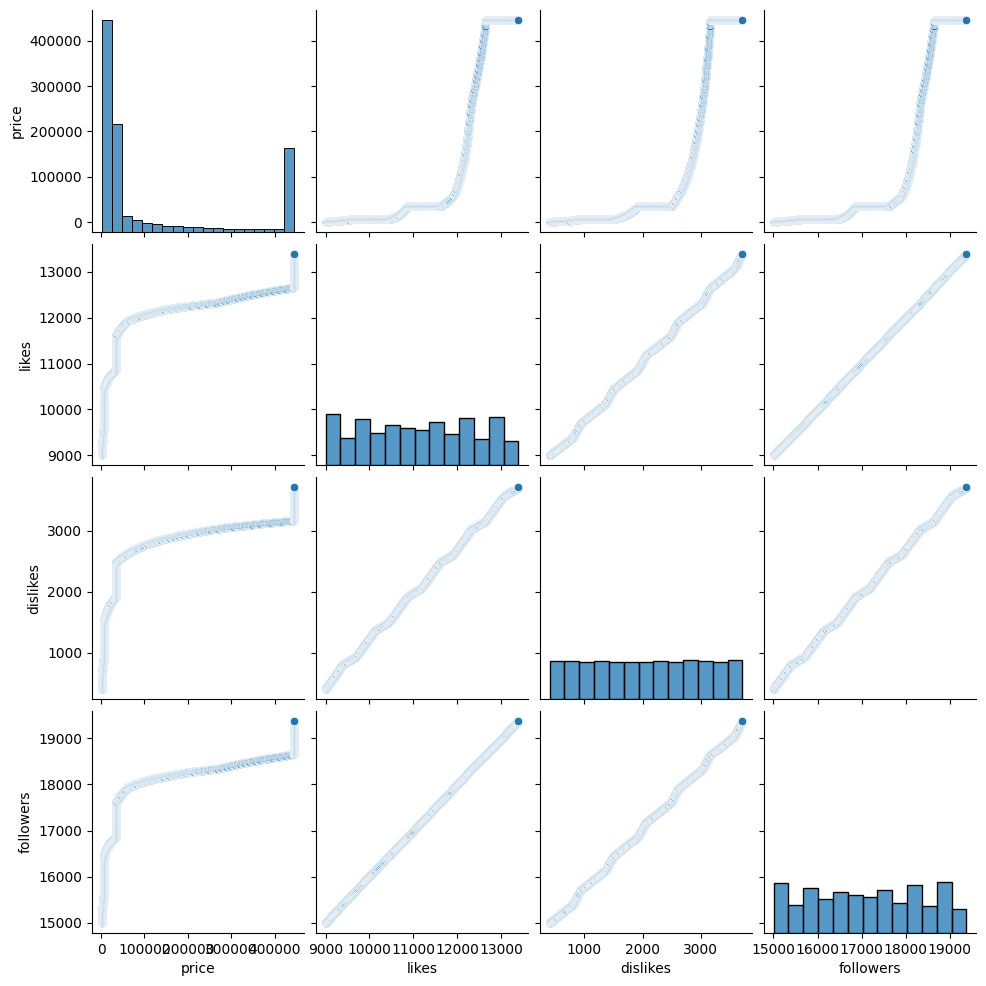

In [16]:
sns.pairplot(df)

# Model Creation

In [17]:
# Splitting the Data
x = df[['likes', 'dislikes', 'followers']]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [18]:
# Scaling the data using StandardScalar
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
# Dictionary of regressors
regressors = {
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "GaussianProcessRegressor": GaussianProcessRegressor(),
    "SVR": SVR(),
    "NuSVR": NuSVR(),
    "Ridge":Ridge(),
    "Lars": Lars(),
    "HuberRegressor": HuberRegressor(),
    "PassiveAggressiveRegressor": PassiveAggressiveRegressor(),
    "ARDRegression": ARDRegression(),
    "BayesianRidge": BayesianRidge(),
    "ElasticNet": ElasticNet(),
    "OrthogonalMatchingPursuit": OrthogonalMatchingPursuit(),
}


In [20]:

df_models = pd.DataFrame(columns=['model', 'run_time', 'rmse'])

for key in regressors:

    print('*',key)

    start_time = time.time()

    regressor = regressors[key]
    model = regressor.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    scores = cross_val_score(model,
                             x_train,
                             y_train,
                             scoring="neg_mean_squared_error",
                             cv=10)

    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'rmse': round(np.sqrt(mean_squared_error(y_test, y_pred)))
    }

    df_models = pd.concat([df_models, pd.DataFrame.from_records([row])])

* RandomForestRegressor
* DecisionTreeRegressor
* GaussianProcessRegressor
* SVR
* NuSVR
* Ridge
* Lars
* HuberRegressor
* PassiveAggressiveRegressor


C:\Users\risha\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


* ARDRegression
* BayesianRidge
* ElasticNet
* OrthogonalMatchingPursuit


In [21]:
df_models.sort_values(by='rmse', ascending=True)

,model,run_time,rmse
0,GaussianProcessRegressor,0.07,265
0,RandomForestRegressor,0.24,344
0,DecisionTreeRegressor,0.0,622
0,Lars,0.0,89586
0,ARDRegression,0.0,89622
0,BayesianRidge,0.0,89631
0,Ridge,0.0,92283
0,OrthogonalMatchingPursuit,0.0,92566
0,HuberRegressor,0.01,93059
0,ElasticNet,0.0,94242


### Using GaussianProcessRegressor as it has rmse of 265 which is lower than other regressors

In [22]:
regressor = GaussianProcessRegressor()
model = regressor.fit(x_train, y_train)
y_pred = model.predict(x_test)


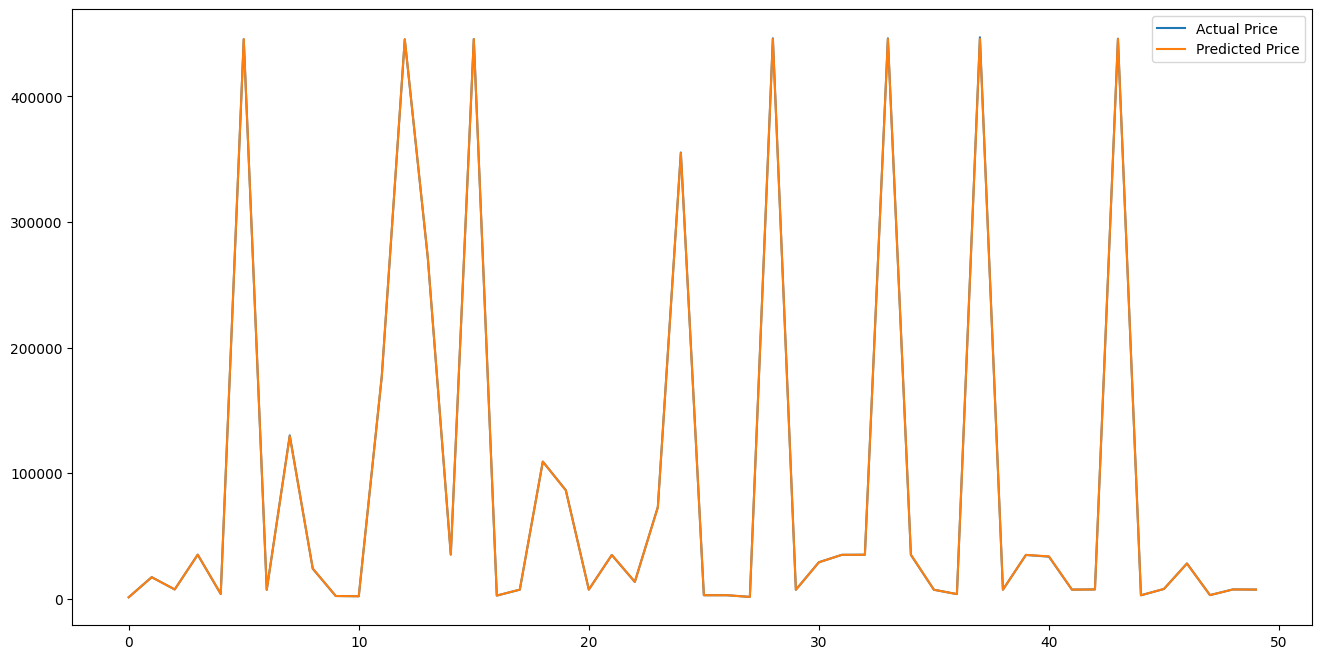

In [24]:
test = pd.DataFrame({'Predicted Price':y_pred, 'Actual Price':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual Price','Predicted Price'])

### The graph illustrates the comparison between actual prices and predicted prices. The two lines (blue for actual prices and orange for predicted prices) closely follow each other, indicating that the model's predictions align well with the actual data. This suggests a high level of accuracy in the model's performance. However, some deviations or spikes may require further analysis to understand potential areas for improvement.

# Predicting the price of the website's product on 1st Jan 2024

In [34]:
temp_data = {
    'likes': [13400],
    'dislikes': [3715],
    'followers': [19381],
}

df_price_input = pd.DataFrame(temp_data, columns=['likes', 'dislikes', 'followers'])


df_price_input_scaled = scaler.transform(df_price_input)

df_price_prediction_result = model.predict(df_price_input_scaled)

print("Predicted Price For 1st January 2024 is -> ", "$",round(df_price_prediction_result[0],2),"CAD")


Predicted Price For 1st January 2024 is ->  $ 446374.82 CAD


# END